# Chapter 2: Constrained optimization

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

**Raúl Pérez-Fernández**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interact, FloatSlider
from teachingtools import *

%matplotlib inline

## Equality constrained minimization problems

We will start with convex optimization problems with linear equality constraints:

\begin{align*}
&\text{minimize } &f(x) \\
&\text{subject to } &Ax=b 
\end{align*}

where $f : \mathbb{R}^n \rightarrow \mathbb{R}$ is convex and twice continuously differentiable and $A\in \mathbb{R}^{p\times n}$ with a rank $p < n$.

A point $x^*\in$ **dom** $f$ is optimal for the above optimization problem only if there is a $\nu\in\mathbb{R}^p$ such that:

$$
Ax^* = b, \qquad \nabla f(x^*) + A^\top\nu^* = 0\,.
$$

### Some toy examples

We will reuse the same toy examples from the previous chapter, but add an equality constraint to both.
    
* Simple quadratic problem:

\begin{gather*}
& f(x_1, x_2) & =& \frac{1}{2} (x_1^2 + 4 x_2^2)\\
& \text{subject to} && x_1 - 2x_2 = 3 
\end{gather*}

* A non-quadratic function:

\begin{gather*}
&f(x_1, x_2)  & =& \log(e^{x_1 +3x_2-0.1}+e^{x_1 -3x_2-0.1}+e^{-x_1 -0.1})\\
& \text{subject to} && x_1 + 3x_2 = 0  
\end{gather*}

In [2]:
from teachingtools import plot_contour, add_path  # functions for showing the toy examples
from teachingtools import quadratic, grad_quadratic, hessian_quadratic
from teachingtools import nonquadratic, grad_nonquadratic, hessian_nonquadratic

/Users/michielstock/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/michielstock/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


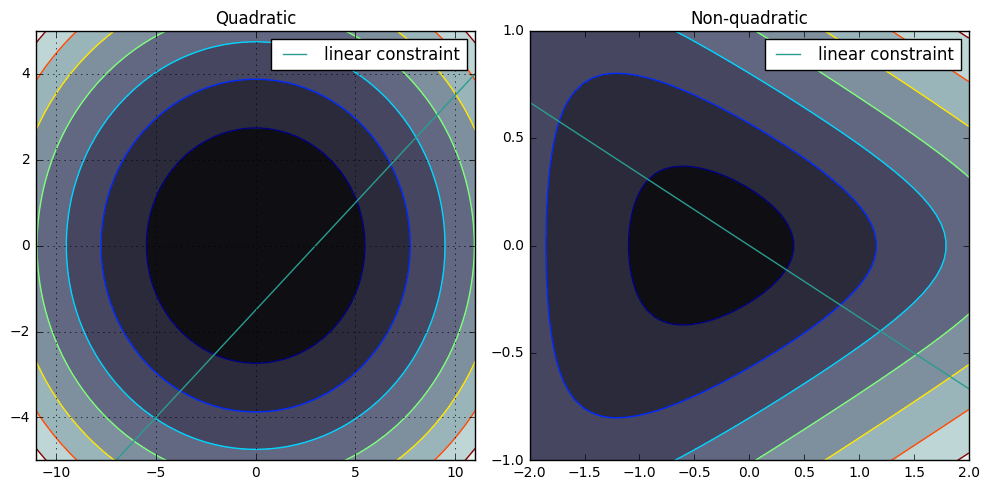

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plot_contour(quadratic, (-11, 11), (-5, 5), ax1, [1.0, -2.0], 3)
ax1.set_title('Quadratic')
ax1.legend(loc=0)
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax2, [1, 3], 0)
ax2.set_title('Non-quadratic')
ax2.legend(loc=0)
fig.tight_layout()
ax1.grid()

### Equality constrained convex quadratic minimization

Consider the following equality constrained convex optimization problem:

\begin{align*}
&\text{minimize } &f(x
) = (1/2)x^\intercal P x + q^\intercal x + r  \\
&\text{subject to } & Ax=b 
\end{align*}

where $P$ is positive definite.

The optimiality conditions are
$$
Ax^* = b, \quad Px^*+q +A^\intercal\nu^*=0\,,
$$
which we can write as

$$
\begin{bmatrix}
P & A^\intercal \\
A & 0 \\
     \end{bmatrix}
     \begin{bmatrix}
x^*\\
\nu^*
     \end{bmatrix}
     =
     \begin{bmatrix}
-q \\
b
     \end{bmatrix}
$$

Hence, convex quadratic optimization problems with linear constraints can be reduced to solving a linear system.

**Assignment**

Complete the code to solve a constrained quadratic problem.

In [ ]:
from constrained import solve_constrained_quadratic_problem

In [ ]:
P = np.array([[1, 0], [0, 4]]) 
A = np.array([[1, -2]])
b = np.array([[3]])
q = np.zeros((2, 1))

In [ ]:
xstar, vstar = solve_constrained_quadratic_problem(P, q, A, b)

print('Minimizer:')
print(xstar)

fig, ax = plt.subplots()
plot_contour(quadratic, (-11, 11), (-5, 5), ax, [1, -2], 3)
ax.scatter(xstar[0,0], xstar[1,0], 50, 'r', label='minimum')
ax.grid()
ax.legend(loc=0)

### Newton's method with equality constrains

To derive $\Delta x_{nt}$ for the following equality constrained problem

\begin{align*}
&\text{minimize } & f(x) \\
&\text{subject to } & Ax=b 
\end{align*}

we apply a second-order Taylor approximation at the point $x$, to obtain

\begin{align*}
&\text{minimize } &\hat{f}(x +v) &= f(x) +\nabla f(x)^\intercal v+ (1/2)v^\intercal \nabla^2 f(x) v \\
&\text{subject to } &A(x+v)&=b\,. 
\end{align*}

Based on the solution of quadratic convex problems with linear contrains, the Newton $\Delta x_{nt}$ step is characterized by

$$
\begin{bmatrix}
 \nabla^2 f(x) & A^\intercal \\
A & 0 \\
     \end{bmatrix}
     \begin{bmatrix}
\Delta x_{nt}\\
w
     \end{bmatrix}
     =
     -\begin{bmatrix}
\nabla f(x) \\
Ax-b
     \end{bmatrix}
$$

Note that when we start at a feasible point, the residual vector $-(Ax-b)$ vanishes and the path will always remain in a feasible region. Otherwise we will converge to it.

### Pseudocode of (in)feasible start Newton method

Rather than performing line search at each step, we will use a fixed step size $\nu\in]0,1]$

>**input** starting point $x\in$ **dom** $f$ with $Ax=b$, tolerance $\epsilon>0$, stepsize $\nu$.
>
>**repeat** 
>
>>    1. Compute the Newton step $\Delta x_{nt}$ and decrement $\lambda(x)$. 
>>    2. *Stopping criterion*. **quit** if $\lambda^2/2\leq \epsilon$.
>>    3. *Update*. $x:=x+\nu\Delta x_{nt}$.
>
>**until** stopping criterium is satisfied.

>**output** $x$

Again, the convergence can be monitored using the Newton decrement:

$$
\lambda^2(x) = - \Delta x_{nt}^\top \nabla f(x)\,.
$$

The algorithm terminates when

$$
\frac{\lambda(x)^2}{2} < \epsilon\,.
$$

**Assignment**

Complete the implementation of linear constrained Newton's method.

In [ ]:
from constrained import linear_constrained_newton

In [ ]:
A = np.array([[1.0, 3.0]])
b = np.array([[0.0]])
x0 = np.array([[0.6], [-0.2]])  # feasible
#x0 = np.array([[0.6], [0.2]])  # unfeasible

In [ ]:
xstar, x_steps, f_steps = linear_constrained_newton(nonquadratic, x0,
                            grad_nonquadratic, hessian_nonquadratic,
                            A, b, stepsize=0.9, epsilon=1e-6, trace=True)

In [ ]:
print('Minimizer:')
print(xstar)

fig, ax = plt.subplots()
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax, [1, 3], 0)
add_path(ax=ax, x_steps=x_steps)
ax.scatter(xstar[0,0], xstar[1,0], 50, 'r', label='minimum')
ax.grid()
ax.legend(loc=0)

**Describe difference in behaviour when using a feasible or infeasible starting point**

YOUR TEXT HERE

## Inequality constrained minimization problems

\begin{align*}
&\text{minimize  } & f_0(x) &\\
&\text{subject to  } & f_i(x) \leq 0, & \quad i=1,\ldots,m\\
& & Ax=b 
\end{align*}

where $f_0,\ldots,f_m\ :\ \mathbb{R}^n \rightarrow \mathbb{R}$ are convex and twice continuously differentiable, and $A\in \mathbb{R}^{p\times n}$ with **rank** $A=p<n$.


**Example**

The non-quadratic function with inequality constraints:

\begin{gather*}
&f(x_1, x_2)  & =& \log(e^{x_1 +3x_2-0.1}+e^{x_1 -3x_2-0.1}+e^{-x_1 -0.1})\\
& \text{subject to} && (x_1 - 1)^2 + (x_2 - 0.25)^2 - 1\leq 0
\end{gather*}

In [ ]:
def nonquadratic_ineq_const(x):
    if (x[0] - 1)**2 + (x[1] - 0.25)**2 - 1 < 0:
        return np.log(nonquadratic(x))
    else:
        return 2
    

fig, ax = plt.subplots()
plot_contour(nonquadratic_ineq_const, (-2, 2), (-2, 2), ax)
ax
ax.set_title('Non-quadratic\ninequality constraint')

We can reformulate the inequality constained problem by an equality constrained problem and apply Newton's method.

\begin{align*}
&\text{minimize } &f_0(x) +\sum_{i=1}^mI_-(f_i(x))\\
&\text{subject to } &Ax=b 
\end{align*}

where $I_-\ :\ \mathbb{R} \rightarrow \mathbb{R}$ is the indicator function for the nonpositive reals,

$$
I_-(u) = \begin{cases}
0 \quad u \leq 0\\
\infty \quad u > 0\,.
\end{cases}
$$

### Logarithmic barrier function

Main idea: approximate $I_-$ by the function:

$$
\hat{I}_-(u) = - (1/t)\log(-u)\,,
$$

where $t>0$ is a parameter that sets the accuaracy of the approximation.

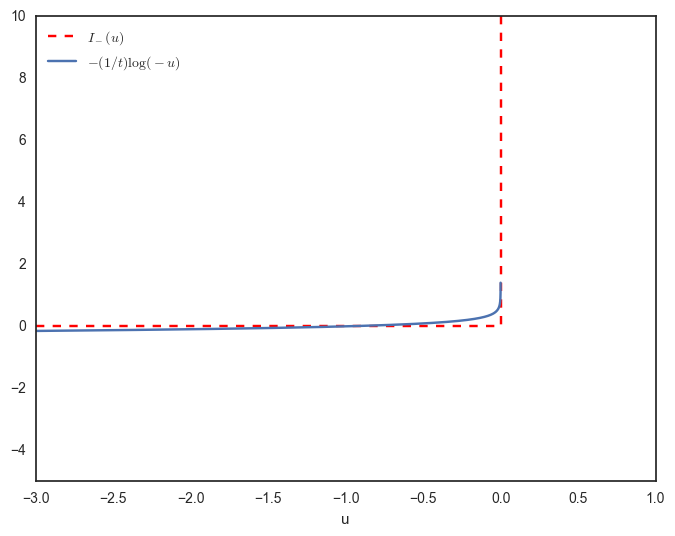

In [ ]:
from teachingtools import plot_log_barrier
interact(plot_log_barrier, t=FloatSlider(min=0.01, max=10.0, step=0.01, value=1))

Thus the problem can be approximated by:

\begin{align*}
&\text{minimize } &f_0(x) +\sum_{i=1}^m-(1/t)\log(-f_i(x))\\
&\text{subject to } &Ax=b\,.
\end{align*}

Since $\hat{I}_-(u)$ is convex and  increasing in $u$, the objective is also convex.

The function

$$
\phi (x) =\sum_{i=1}^m-\log(-f_i(x))\,
$$

is called the **logaritmic barrier** for the constrained optimization problem.

The parameter $t$ determines the quality of the approximation, the higher the value the closer the approximation matches the original problem. The drawback of higher values of $t$ is that the problem becomes harder to optimize using Newton's method, as its Hessian will vary rapidly near the boundary of the feasible set.

### The barrier method and the central path

We will optimize the following equivalent problem:

\begin{align*}
&\text{minimize } &tf_0(x) +\phi (x)\\
&\text{subject to } &Ax=b\,.
\end{align*}

The points of the central path are the solutions $x^*(t)$ of this problem for a given value of $t$.

The barrier method works by iteratively (approximatively) solving this optimization problem for increasing values of $t$.

### Pseudocode of the barrier method

>**input** strictly feasible $x$, $t:=t^{(0)}>0, \mu>1$, $t_\text{max}$, tolerance $\epsilon>0$.
>
>**repeat** 
>
>>    1. *Centering step*.<br>
>>   Compute $x^*(t)$ by minimizing $tf_0+\phi$, subject to $Ax=b$, starting at $x$.
>>    2. *Update*. $x:=x^*(t)$
>>    3. *Increase* $t$. $t:=\mu t$.
>
>**until** $t>t_\text{max}$

>**output** $x$

**Accuracy of centering**

In step 2, computing $x^*(t)$ exactly is not necessary since the central path has no significance beyond the fact that it leads to a solution of the original problem as $t\rightarrow\infty$.

**Choice of $\mu$**

The choice has a trade-off in the number of inner and outer iterations required:
- If $\mu$ is small (close to 1) then $t$ increases slowly. A large number of Newton iterations will be required, but each will go fast.
- If $\mu$ is large then $t$ increases very fast. Each Newton step will take a long time to converge, but few iterations will be needed.

The exact value of $\mu$ is not particularly critical, values between 10 and 20 work well.

**Choice of $t^{(0)}$**

- If $t^{(0)}$ is chosen too large: the first outer iteration will require many iterations.
- If $t^{(0)}$ is chosen too small: the algorithm will require extra outer iterations.

## Project 2: oligomerization of proteins
![A protein complex](Figures/complex.jpg)

In this project we will study the association of protein complexes through the principle of **entropy maximization**. 

Consider the following three proteins: A, B and C:

![Three monomeric proteins.](Figures/monomers.jpg)

Each of these proteins has sites which it can use to reversible bind to other proteins. Two types of interactions can be distinguished:
- **weak type I interactions**: protein A has one type I donor site, protein C has one type I acceptor site and protein B has both an acceptor and a donor site. In the figures, these sites are indicated as a triangle sticking in (acceptor) or out (donor) the protein.
- **strong type II interaction**: protein A has one type II acceptor site and protein C has one type II donor site. These sites are depicted as two bumps sticking out or pressing in the protein.

These sites allow for dimerisation of the proteins. All possible homo- and hetero-dimers are shown below.

![The proteins can form dimers according to their sites.](Figures/dimers.jpg)

But tri-and tetramers can also be formed:

![One trimer and three tetramers.](Figures/oligomers.jpg)

Let us use one (monomer), two (dimer), three (trimer) and four (tetramer) character long strings to denote all possible conformations. Here we use the convention that the string $P_1P_2P_3P_4$ represents the tetramer
$$
\left (\begin{array}{cc}
P_1 & P_2 \\
P_4 & P_3\end{array} 
\right ) \,.
$$

Note that in our notation, we have
$$
P_1P_2P_3P_4 = P_4P_1P_2P_3 = P_3P_4P_1P_2 = P_2P_3P_4P_1\,,
$$
but
$$
P_1P_2P_3 \neq P_3P_1P_2 \neq P_2P_3P_1\,.
$$

The following code identifies all unique mono-and oligomers.

In [ ]:
monomers = set(['A', 'B', 'C'])

dimers = set(['AC', 'CB', 'CA', 'BA', 'BB'])

trimers = set([dm1 + dm2[1] for dm1 in dimers
               for dm2 in dimers if dm1[1:] == dm2[:-1]])

tetramers = set([dm1 + dm2[2] for dm1 in trimers
                 for dm2 in trimers if dm1[1:] == dm2[:-1]
                 if dm2[-1] + dm1[0] in dimers])

# some tetramers are counted multiple times, because our encoding is not unique
# let us remove duplicates

lowest_lexo = lambda polymer : sorted([polymer[i:] + polymer[:i] for i in range(len(polymer))])[0]
tetramers = set(map(lowest_lexo, tetramers))

compounds = monomers | dimers | trimers | tetramers
compounds = list(compounds)
compounds.sort()
monomers =list(monomers)
monomers.sort()

print('There are {} unique compounds'.format(len(compounds)))

In [ ]:
monomers

In [ ]:
compounds

Oligiomerzation is a process that releases energy. The change of heat in a system is quantified by the enthalpy. Formation of a type I bonds results in a change of enthalphy of $\Delta H$ of -1 Joule / mol (heat is released when two monomers bind), while type II bonds have a change of enthalpy of $\Delta H$ of -2 Joule / mol.

The following piece of code returns the energy the formation enthalpy of a compound.

In [ ]:
binding_enthalpy = {'AC' : -2, 'BA' : -1, 'BB' : -1, 'CA' : -1, 'CB' : -1}

def get_enthalpy(compound):
    if len(compound) == 1:
        return 0  # no bonds
    else:
        enthalpy = 0
        for i in range(len(compound) - 1):
            dimer = compound[i:i+2]
            enthalpy += binding_enthalpy[dimer]
        if len(compound)==4:
            enthalpy += binding_enthalpy[compound[-1] + compound[0]]
        return enthalpy

In [ ]:
enthalpies_dict = {compound : get_enthalpy(compound) for compound in compounds}

print('Formation enthalpies:')
for compound, enthalpy in enthalpies_dict.items():
    print('{} => {}'.format(compound, enthalpy))
    
enthalpies = [enthalpies_dict[comp] for comp in compounds]  # as list, same order as compounds
enthalpies = np.array(enthalpies).reshape((-1, 1))  # as Numpy array

Since all the association and dissociation reactions are assumed to be reversible, a mixture of the three monomers should give rise to all possible mono- and oligomers (though not necessarily in equal quantities). We will assume that the system will go to an equilibrium where the Gibbs free engery is highest. The Gibbs free energy depends both on the entropy as well as the enthalpy of the system.

Let us denote $x$ as the vector containing the concentrations of the 19 possible species. The entropy of the system is given by

$$
S(x) = - \sum_{i=1}^{19}x_i \log x_i\,.
$$

The enthalpy of the system is given by

$$
H(x) = \sum_{i=1}^{19}x_i h_i\,,
$$

with $h_i$ the formation enthalpy of compound $i$.

The Gibbs free energy is then given by

$$
G(x) = H(x) - T S(x)
$$

with $T\geq0$ the temperature of the system (in Kelvin). Systems with a constant temperture go to a state with a minimal Gibbs free energy.

Note that:
- By low temperatures, enthalpy dominates. The enthalpy can be raised by the formation of oligomers with multiple low-energy bonds.
- By high temperature, entropy dominates. High entropy can be obtained by having many different species at a low concentration.

The concentration of each species can not be freely chosen, vector $x$ has two types of constraints:
- **equality constraints**: there is a conservation of mass: the total quantity of A, B, C in all the species should remain constant. These form four linear equality contraints.
- **inequality constraints**: since $x$ is a vector with concentrations all elements should be larger than zero: i.e. $x_i \geq 0$. 

The equality constraints are given by the stoichimetric matrix $S$, a $3\times 19$ matrix which quantifies how many of individual molecules $A$, $B$ and $C$ are in a complex and $c$ is the vector of length 3 containing the total of $A$, $B$ and $C$ in the system.

The optimization problem can thus be formulated as follows:

\begin{align*}
&\text{minimize  } & G(x) = H(x) - T S(x) &\\
&\text{subject to  } & x \succeq 0\\
& & Sx=c\,.
\end{align*}

We will minimize this objective using a simplified version of the barrier method. Rather than exactly solving the soft-constrained problem using the feasible start Newton algorithm, we will simply calculate the constrained Newton step for each value of $t$ and follow this direction with a fixed stepsize for a certain number of times. This simplified barrier method is described by the following pseudocode.

### Pseudocode of the simplified barrier method

>**input** strictly feasible $x$, $t:=t^{(0)}>0, \mu>1$, stepsize $\nu$, tolerance $\epsilon$, number of inner Newton steps.
> 
>**while** $m / t > \epsilon$<br>
>
>>    **for** some number of inner Newton steps
>>> Compute the linear constrained Newton step $\Delta x_{nt}$ for $tf_0+\phi$<br>
>>> **Update**: $x := x - \nu \Delta x_{nt}$<br>
>>
>> $t:=\mu t$<br>
>
>**output** $x$

** Project assignment**

1. Suppose that an initial mixture contains only the monomers A, B and C with relative fractions of 0.3, 0.4 and 0.3. Give the matrix $S$ and vector $c$ of the linear constraints of the system. 
2. Formulate the approximation of the inequality constraint problem using the logarithmic barrier, with the hyperparameter $t$ to control the quality of the approximation. Complete the functions `gibbs_fun`, `gibbs_grad` and `gibbs_hessian` which give the function value, gradient and hessian of the soft-constraint approximantion. These functions take as inputs the vector of concentrations $x$, the temperature $T$ and the hyperparameter $t$. The enthalpy per mol is available in the vector `enthalpies`.
3. Complete the implementation for performing one feasible constrained Newton step. Use the implemented functions regarding the soft-constraint entropy as global functions.
4. Give a feasible $x_0$, i.e. a vector with concentrations which satifies the constraints and where **all** concentrations are larger than 0. The function`feasible_init` starts with the initial concentrations of A, B and C and make a small quantity of each other possible species.
5. Complete the implementation of `barrier_method`. Use this to calculate the equilibrium concentration of the different species at a temperature of 100 Kelvin. Toy with the hyperparameters of the optimization algorithm to get a good approximation. It should not matter is you use a feasible or infeasible start.
6. Make a plot of the concentrations and entropy of the equilibrium system at different temperatures. Vary $T$ from $10^{-2}, 10^{-1},\ldots, 10^4$.
7. Use grid search (step size of 0.01) to the initial quantities of A, B and C (total quantity is equal to 1) that have to be mixed at a temperature of 100K to obain:
    - the equilibrium mixture with the highest entropy
    - the equilibrium mixture with the lowest enthalphy
    - the equilibrium mixture with the highest concentration of CBA

**ASSIGNMENT 1**

Complete the matrix $S$ and vector $c$ to describe the mass balance of the system.

In [ ]:
# your code here!
S = ...
c = ...

In [ ]:
print(S)

In [ ]:
print(c)

**ASSIGNMENT 2**

Complete the function and partial derivatives and implement these functions.

\begin{align*}
&\text{minimize  } & t\sum_{i=1}^{19}[h_ix_i + Tx_i \log x_i] -\sum_{i=1}^{19}\log x_i&\\
& & Sx=c\,.
\end{align*}

**Function**

$$
f(x, T, t)=\ldots
$$

**Gradient**

$$
\frac{\partial f(x, T, t)}{\partial x_i}=\ldots
$$

**Hessian**

$$
\frac{\partial^2 f(x, T, t)}{\partial x_i^2}=\ldots
$$

Note that

$$
\frac{\partial^2 f(x, T, t)}{\partial x_i\partial x_j}=\ldots \qquad \text{if $i\neq j$}
$$

In [ ]:
def gibbs_fun(x, T, t):
    """
    Negative entropy
    Inputs:
        - x: vector of the concentrations (19 x 1)
        - T: temperature
        - t: parameter for soft constraint
    Output: the function value of the negative entropy
    """
    # complete...

def gibbs_gradient(x, T, t):
    """
    Gradient of the negative entropy
    Inputs:
        - x: vector of the concentrations (19 x 1)
        - T: temperature
        - t: parameter for soft constraint
    Output: the gradient of the negative entropy
        (19 x 1 vector)
    """
    # complete...

def gibbs_hessian(x, T, t):
    """
    Hessian of negative entropy
    Inputs:
        - x: vector of the concentrations (19 x 1)
        - T: temperature
        - t: parameter for soft constraint
    Output: the gradient of the negative entropy
        (19 x 19 matrix)
    """
    # complete...

**ASSIGNMENT 3**

Complete the code for a single constrained Newton step for this problem.

In [ ]:
def constained_newton_step(x, S, c, T, t):
    """
    Computes a constrained Newton step for the approximated
    Gibbs free energy minimization problem.
    
    Inputs:
        - x: point in which to compute the Newton step, does not have to be feasible
        - S, c: matrix and vector of the system describing the mass balance
        - T: temperature of the system
        - t: constant of the approximation of the logaritmic barrier
        
    Output:
        - Dx: the Newton step
    """
    # complete
    ...
    Dx = ...
    return Dx

In [ ]:
constained_newton_step(np.ones((19,1)), S, c, T=100, t=0.1)

**ASSIGNMENT 4**

In [ ]:
def feasible_init(A=0.3, B=0.4, C=0.3, init_frac=1e-4):
    """
    Generates a strictly feasible inital solution with given fractions
    of A, B and C.
    Starts with a vector containing only the initial monomers and creates
    a vector with positive concentrations by making an init_frac of
    each oligomer. 
    """
    iA = compounds.index('A')
    iB = compounds.index('B')
    iC = compounds.index('C')
    x0 = np.zeros((len(compounds), 1))
    x0[iA] = A
    x0[iB] = B
    x0[iC] = C
    for i, comp in enumerate(compounds):
        if comp != 'A' and comp != 'B' and comp != 'C':
            x0[iA] -= init_frac * comp.count('A') 
            x0[iB] -= init_frac * comp.count('B')
            x0[iC] -= init_frac * comp.count('C')
            x0[i] = init_frac
    return x0

In [ ]:
x0 = ...
print(x0)

In [ ]:
# check if mass balance is satisfied
print(S.dot(x0) - c)

In [ ]:
# check if all concentrations are positive
print(np.alltrue(x0>0))

**ASSIGNMENT 5**

Complete the code for the simplified barrier method.

In [ ]:
def barrier_method(x0, S, c, T, t0=0.001, eps=1e-5, mu=1.5, nu=0.2,
                   n_inner=25):
    """
    Simplified version of the barrier method, uses a fixed number of
    steps and a fixed stepsize for the optimization.
    
    Inputs:
        - x0: starting point, vector with strictly positive elements, but not necessarily feasible
        - S, c: matrix and vector of the system describing the mass balance
        - T: temperature of the system
        - t0: initial constant of the approximation of the logaritmic barrier
        - eps: tolerance for stopping
        - mu: hyperparameter to determine how fast t increases
        - nu: size of Newton step
        - n_inner: number of inner newton steps with fixed t
        
    Output:
        - Dx: the Newton step
    """
    t = t0    
    x = x0
    while ...:
        for i in ...
            Dx = ...
            x = ...
        t *= mu
    return x

In [ ]:
x0 = feasible_init(A=c[0], B=c[1], C=c[2], init_frac=1e-3)
x0 = np.ones_like(x0)

In [ ]:
xstar = barrier_method(x0, S, c, T=100)
for comp, conc in zip(compounds, xstar):
    print(comp, conc)

**Assignment 6**

In [ ]:
# functions for calculating entropy and enthalpy
entropy = lambda x : - np.sum(x * np.log(x))
enthalpy = lambda x : np.sum(enthalpies * x.reshape((-1, 1)))

In [ ]:
temperature_steps = 10.0 ** np.arange(-2, 6)
temperature_steps

In [ ]:
concentrations_temp = np.zeros((19, len(temperature_steps)))
entropy_temp = np.zeros((len(temperature_steps, )))
enthalpy_temp = np.zeros((len(temperature_steps, )))

In [ ]:
for i, T in enumerate(temperature_steps):
    x0 = feasible_init(A=c[0], B=c[1], C=c[2], init_frac=1e-3)
    concentrations_temp[:, i] = barrier_method(x0, S, c, T=T).ravel()
    entropy_temp[i] = entropy(concentrations_temp[:, i])
    enthalpy_temp[i] = enthalpy(concentrations_temp[:, i])

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 15))

linestyles = ['-','--', '-.', ':']

ax0.loglog()
ax0.set_xlabel('Temperature')
ax0.set_ylabel('Concentration')
for i, comp in enumerate(compounds):
    comp_len = len(comp)
    ax0.plot(temperature_steps, concentrations_temp[i, :],
             ls=linestyles[comp_len-1], label=comp)
ax0.legend(loc=0)

ax1.semilogx()
ax1.plot(temperature_steps, entropy_temp)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Entropy')

ax2.semilogx()
ax2.plot(temperature_steps, enthalpy_temp)
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Enthalpy')

**Describe the obtained plots and give a physicochemical interpretation**

YOUR TEXT HERE

**Assignment 7**

In [ ]:
equilibriums = []

for A in np.arange(0.01, 0.98, 0.05):
    for B in np.arange(0.01, 1 - A - 0.01, 0.05):
        C = 1 - A - B  # all sum to one
        c = np.array([[A], [B], [C]])
        x0 = feasible_init(A, B, C)
        xstar = barrier_method(x0, S, c, T=100, nu=0.2, n_inner=20)
        equilibriums.append((xstar, (A, B, C)))  # save equilibrium mixture and constitution

**Find inital mixture which will lead to the highest entropy.**

In [ ]:
# your code here

**Find inital mixture which will lead to the lowest enthalpy.**

In [ ]:
# your code here

**Find inital mixture which will lead to the highest concentration CBA.**

In [ ]:
# your code here

## References

Boyd, S. and Vandenberghe, L. *'Convex Optimization'*. Cambridge University Press (2004) [link](https://stanford.edu/~boyd/cvxbook/)